In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.ticker as ticker
import datetime
import pickle
sys.path.insert(0, os.path.abspath('../lib'))
import c19all

df = pickle.load(open( '../output/pickles/df_us_combined.p', 'rb')).reset_index()

''' Define the analytic dataset
    count_of:   required, `cases_nyt`, `cases_jnu`, `deaths_nyt`, `deaths_jhu`, `recovered` (JHU), `active` (JHU)
    start_date: required, >= 2020-01-02
    location:   optional, comment out the declaration for national level data. Options are:
        `region`, `sub_region`, `state`, `county`. For county, value is ['county_name', 'state_name']
'''
count_of = 'cases_nyt'
start_date = pd.to_datetime('2020-03-01')
location = {
    'type': 'county',
    'value': ['Grafton', 'New Hampshire']
}

if 'location' in locals():
    if location['type'] == 'county':
        county = location['value'][0]
        state = location['value'][1]
        df = df[df.county == county]
        df = df[df.state == state]
        ylabel = f'{county} county, {state} {count_of}'
        title = f'New Covid-19 cases per day in {county} county, {state}'
    else:
        df = df[df[location['type']] == location['value']]
        ylabel = f'{location["value"]} {location["type"]} {count_of}'
else:
    ylabel = f'US { count_of}'



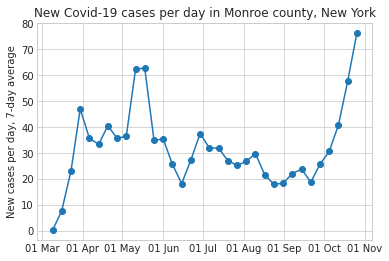

In [34]:
def monday_of_week(row):
    return datetime.datetime.strptime(row.year_week_string + '-1', "%Y-W%W-%w")

df = df[df.date >= start_date]
df['count_of_diff'] = df[count_of].diff()
df = df.iloc[1:]
df['year'] = df.date.dt.strftime('%Y')
df['week'] = df.date.dt.strftime('%W')
df['year_week_string'] = df.apply(lambda row: f"{row.year}-W{row.week}", axis=1)
df['monday'] = df.apply(lambda row: monday_of_week(row), axis=1)
df['monday_str'] = df.apply(lambda row: row.monday.strftime('%b %-d'), axis=1)
df = df.groupby([df.monday, df.monday_str], as_index=False).count_of_diff.mean()
x_axis = plt.axes().xaxis
x_axis.set_major_locator(dt.MonthLocator())
x_axis.set_major_formatter(dt.DateFormatter('%d %b'))
plt.ylabel('New cases per day, 7-day average')
plt.style.use('seaborn-whitegrid')
plt.title(title)
plt.plot(df.monday, df.count_of_diff, 'o-')
plt.show()
